# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Get today's date
from datetime import date
today = date.today().strftime("%m/%d/%Y")

# Output File (CSV)
out_dir = 'output_data'
output_data_file = os.path.join(out_dir,'cities.csv')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
base = 'http://api.openweathermap.org/data/2.5/weather'
params = {'appid':api_key,
         'q':'',
         'units':'imperial'}
city_sets = []
data = []
set_count = 1
record_count = 1

In [3]:
def collect(r):
    d = {}
    d['City'] = r['name']
    d['Cloudiness'] = r['clouds']['all']
    d['Country'] = r['sys']['country']
    d['Date'] = r['dt']
    d['Humidity'] = r['main']['humidity']
    d['Lat'] = r['coord']['lat']
    d['Lng'] = r['coord']['lon']
    d['Max Temp'] = r['main']['temp_max']
    d['Wind Speed'] = r['wind']['speed']
    return d

## Generate Cities List

In [4]:
cities = []
def generate_cities():
    # List for holding lat_lngs and cities
    lat_lngs = []
    cities = []

    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)
    return cities

# Print the city count to confirm sufficient count
while len(cities) < 500:
    cities = generate_cities()
len(cities)

599

In [5]:
n = 50
sets = [cities[i * n:(i + 1) * n] for i in range((len(cities) + n - 1) // n )]
len(sets)

12

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
print("""Beginning Data Retrieval
-----------------------------""")
for cities in sets:                                                                         
    for city in cities:
        params['q'] = city
        r = requests.get(base,params)
        r_json = r.json()
        if r.status_code==200:
            print(f'Processing Record {record_count} of Set {set_count} | {city}')
            data.append(collect(r_json))
            record_count +=1
        else:
            print(r_json['message'].capitalize() + '. Skipping...')
        time.sleep(1)
    set_count += 1
    record_count = 1
print("""-----------------------------
Data Retrieval Complete      
-----------------------------""")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | krasnyy chikoy
Processing Record 3 of Set 1 | tura
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 1 | kudahuvadhoo
Processing Record 5 of Set 1 | tessalit
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | vung tau
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | jamestown
City not found. Skipping...
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | sampit
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | le vauclin
Processing Record 19 of Set 1 | rabo de peixe
Processing Record 20 of Set 1 | kaitangata
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df = pd.DataFrame(data)
df.count()

City          526
Cloudiness    526
Country       526
Date          526
Humidity      526
Lat           526
Lng           526
Max Temp      526
Wind Speed    526
dtype: int64

In [8]:
with open(output_data_file,'w+') as output:
    output = df.to_csv(output_data_file)

In [9]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,9,PF,1577742727,73,-9.80,-139.03,80.55,14.50
1,Krasnyy Chikoy,10,RU,1577742728,93,50.36,108.75,-20.24,1.88
2,Tura,0,RU,1577742729,91,64.27,100.22,-27.51,4.83
3,Kudahuvadhoo,100,MV,1577742732,77,2.67,72.89,82.22,12.37
4,Tessalit,0,ML,1577742733,13,20.20,1.01,63.52,9.64


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

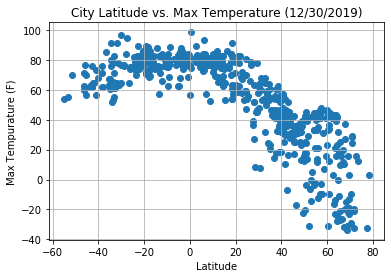

In [14]:
plt.title(f'City Latitude vs. Max Temperature ({today})')
plt.scatter(df['Lat'],df['Max Temp'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (F)')
plt.savefig(os.path.join(out_dir,'lat_vs_temp.png'))
plt.show()

#### Latitude vs. Humidity Plot

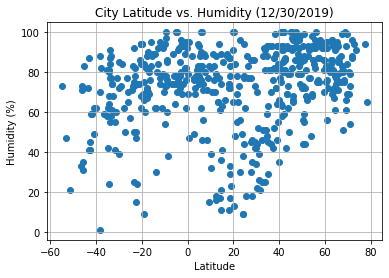

In [11]:
plt.title(f'City Latitude vs. Humidity ({today})')
plt.scatter(df['Lat'],df['Humidity'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig(os.path.join(out_dir,'lat_vs_humidity.png'))
plt.show()

#### Latitude vs. Cloudiness Plot

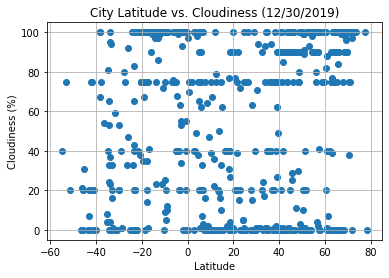

In [12]:
plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.scatter(df['Lat'],df['Cloudiness'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig(os.path.join(out_dir,'lat_vs_cloudiness.png'))
plt.show()

#### Latitude vs. Wind Speed Plot

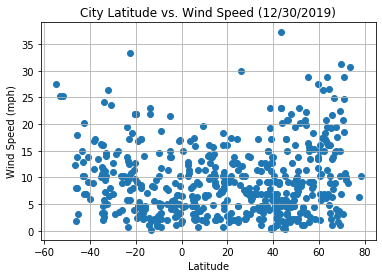

In [13]:
plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.scatter(df['Lat'],df['Wind Speed'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig(os.path.join(out_dir,'lat_vs_wind-speed.png'))
plt.show()